In [5]:
import os
from glob import glob

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_paths = glob('../dataset/cifar/train/*.png')
data_paths[0]

'../dataset/cifar/train/0_frog.png'

In [3]:
path = data_paths[0]
path

'../dataset/cifar/train/0_frog.png'

In [6]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
image.shape

TensorShape([32, 32, 3])

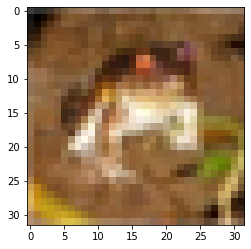

In [7]:
plt.imshow(image)
plt.show()

## tf.data

In [8]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [9]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)

In [10]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

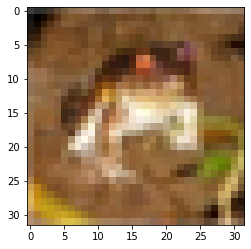

In [11]:
plt.imshow(tf_image)
plt.show()

## batch 묶기

In [13]:
batch_size = 8

In [14]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [15]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([8, 32, 32, 3])

## shuffle 하기

In [16]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(data_paths))

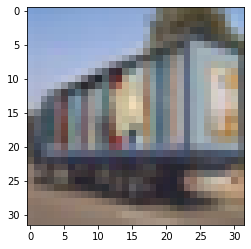

In [17]:
tf_images = next(iter(dataset))

plt.imshow(tf_images[0])
plt.show()

## Label과 함께 넣기

In [20]:
path.split('_')[-1].replace('.png', '')

'frog'

In [21]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

In [22]:
path, get_label(path)

('../dataset/cifar/train/0_frog.png', 'frog')

In [23]:
label_names = [get_label(path) for path in data_paths]

In [25]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [26]:
onehot_encoding = np.array(class_names == 'frog', np.uint8)
onehot_encoding

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [36]:
def onehot_encoding(label):
    return np.array(class_names == label, np.uint8)

In [31]:
def read_image_label(path, label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, label

In [33]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [35]:
image, label = next(iter(dataset))

image.shape, label.shape, label[0]

(TensorShape([8, 32, 32, 3]),
 TensorShape([8]),
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>)

## tensorflow 함수로 label 얻기

In [38]:
fname = tf.strings.split(path, '_')[-1]
fname

<tf.Tensor: shape=(), dtype=string, numpy=b'frog.png'>

In [40]:
cls_name = tf.strings.regex_replace(fname, '.png', '')
cls_name

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

In [41]:
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [43]:
onehot = tf.cast(class_names == cls_name, tf.uint8)
onehot

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

In [44]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(class_names == cls_name, tf.uint8)
    return onehot

In [45]:
def read_image_label(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    # get label
    label = get_label(path)
    
    return image, label

In [46]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [48]:
image, label = next(iter(dataset))
image.shape, label.shape, label[0]

(TensorShape([8, 32, 32, 3]),
 TensorShape([8, 10]),
 <tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>)